![example](images/camera-filming-banner2.jpg)

# A Movie Production Analysis for Microsoft

**Authors:** Sameeha Ramadhan

## Overview

This analysis attempts to satisfy the informational needs of Microsoft (MSFT) by investigating the film industry to determine which types of films their new studio should produce. We will look at a number of factors to better understand what contributes to the success of a movie, and in turn offer a few recommendations on the best strategies to get started. Descriptive analysis of popular genres and profit data show that while the preferred movie types that some people enjoy varies seasonally (think: horror films around Halloween and Christmas movies during the Christmas season), overall the three types of films that are currently doing the best profit-wise are: romance, kids & family, and musicals . Microsoft can use this analysis to adjust planning, production, and marketing to hit the ground running as they enter this highly competitve space.

 # Business Problem
 ![example](images/data-film.jpg)

Microsoft may be able to enter the movie making sector and successfully stand out from fierce competition by choosing to create films that their target audiences have shown to thoroughly enjoy. Doing so will allow them to produce movies that will instantly become hits, which will in turn allow them to improve on and produce even more content, setting them up to be a studio force to be reckoned with. Using data from well-known industry sources such as Imdb, I analyze and explain patterns in popular movie types based on ratings and reviews, as well as budgeting decisions to help predict what audiences want from a film and thus, guaranteeing its success.

## Data Understanding

Rotten Tomatoes is a well-known review-aggregation website for television and film. Due to its frequent use by the American public, it is widely viewed as the 'go-to' in deciding whether or not a movie or show is worth watching. IMDB.com is a database that is considered to be the most authoritative source for all film and television related material. The data from both websites provides information such as, but not limited to, budgets, reviews and ratings.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [44]:
#Provided datasets:
movies_budget = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')
rt_movies = pd.read_csv('./data/zippedData/rotten_tomatoes_movies.csv.gz')

When starting this analysis, the first thought that comes to mind is to determine what the most popular types of movies are and what are the average profits for the top 3 genres. To start exploring these facts, I will begin by examining and sorting the top 20 movie genres and then plotting the results for easy viewing.

In [3]:
#Preview the rt_movies dataset (from Rotten Tomatoes).
rt_movies.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


I will begin preparing and cleaning my data by starting with the movie names and genres. Since I've decided on which information I want to work with and which to eliminate, I've chosen to make a new dataframe using only the columns I'll be needing.

In [4]:
table = rt_movies[['movie_title', 'genres']]
movies_table = pd.DataFrame(table)
movies_table.head(2)

,movie_title,genres
0,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic..."
1,Please Give,Comedy


In [5]:
#Renaming the movie column for merging later.
movies_table.rename(columns= {'movie_title': 'movie'}, inplace=True)

In [6]:
#Converting the column to a string for easy manipulation.
movies_table['genres'].astype(str)
#I'm removing extra spaces in the column that caused a few genres to be duplicated.
movies_table['genres']= movies_table['genres'].str.replace(' ', '')
#Replacing the spacing between each ampersand.
movies_table['genres']= movies_table['genres'].str.replace('&', ' & ')

In [7]:
#I make a new dataframe from the 'genres' column by first splitting the column where each comma is found. I then pivot
#the table using the explode method while counting the number of times each genre appears by using the value_counts method.
#Then, preview.
genre_count = movies_table['genres'].str.split(',').explode().value_counts()
movie_genres = pd.DataFrame(genre_count)
#Rename the columns
movie_genres.reset_index(inplace=True)
movie_genres = movie_genres.rename(columns = {'index':'Genre', 'genres':'Movie Count'})
movie_genres.head(15)

,Genre,Movie Count
0,Drama,9542
1,Comedy,5674
2,Action & Adventure,3551
3,Mystery & Suspense,3534
4,ArtHouse & International,2499
5,Documentary,2067
6,Horror,2043
7,Romance,1916
8,ScienceFiction & Fantasy,1865
9,Classics,1649


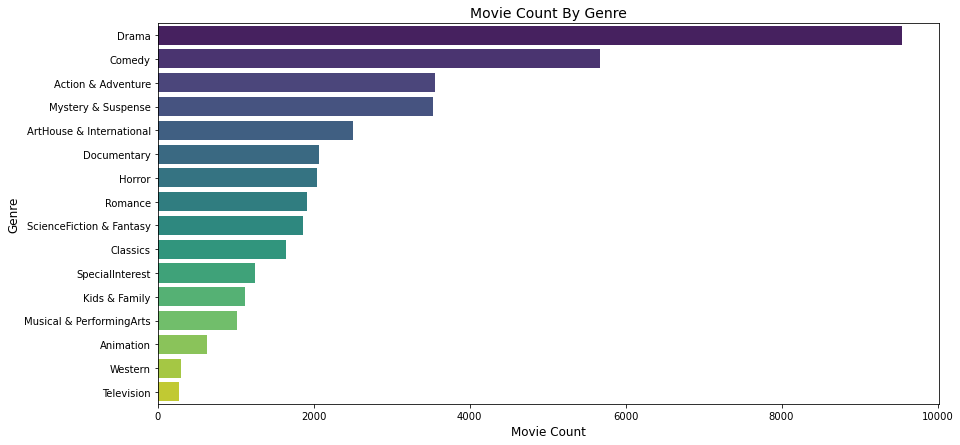

In [8]:
plt.figure(figsize=(14,7))
ax1 = sns.barplot(x=movie_genres.loc[0:15,'Movie Count'], y=movie_genres.loc[0:15,'Genre'], palette='viridis')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14);

We can see from this chart that **Dramas** top the number of films produced, followed by **Comedies** and **Action & Adventure**. This is rather well known; however, for a studio producing movies, the important question is which films are most profitable. To answer this question, we should explore what a desirable profit and profit margin should be for a movie.

# How big a profit  and profit margin does a successful movie have?

I will first determine how much profit each movie has made. To do so, we start by looking at the movies_budget data frame.


In [9]:
#Preview the movies_budget data frame.
movies_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
#I make a new data frame so I can return to the original one should need be:
movie_profits = movies_budget
#Then I will need to convert the production_budget, domestic_gross, and worldwide_gross columns to integers in order to 
#make calculations. First, I remove the '$':
movie_profits.domestic_gross = [x.strip('$') for x in movie_profits.domestic_gross]
movie_profits.production_budget = [x.strip('$') for x in movie_profits.production_budget]
movie_profits.worldwide_gross = [x.strip('$') for x in movie_profits.worldwide_gross]

In [11]:
#Then, I remove the commas and revert the strings to integers:
movie_profits.domestic_gross = movie_profits['domestic_gross'].astype(str).str.replace(',', '').astype(int) 
movie_profits.production_budget = movie_profits['production_budget'].astype(str).str.replace(',', '').astype(int) 
movie_profits.worldwide_gross = movie_profits['worldwide_gross'].astype(str).str.replace(',', '').astype(np.int64) 
#Because the numbers in this column are large, I used the .astype(np.int64) method.

Now let's remove all non profitable movies and have a look at our new data frame.

In [12]:
movie_profits = movies_budget[movies_budget['domestic_gross'] !=0]
movie_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


Next, I'll create and add a new column by calculating the profit of each film and defining it as profits.

In [41]:
movie_profits['profit'] = movie_profits['worldwide_gross'] - movie_profits['production_budget']
movie_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,0.846921,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251,December
...,...,...,...,...,...,...,...,...,...
5775,76,2006-05-26,Cavite,7000,70071,71644,64644,0.902295,May
5776,77,2004-12-31,The Mongol King,7000,900,900,-6100,-6.777778,December
5778,79,1999-04-02,Following,6000,48482,240495,234495,0.975051,April
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,-2.736921,July


And I'll add a profit margin column so we can thoroughly evaluate how much a movie has made:

In [40]:
movie_profits['profit_margin'] = (movie_profits['worldwide_gross'] - 
                                    movie_profits['production_budget'])/movie_profits['worldwide_gross']
movie_profits.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,0.846921,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251,December
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972,December
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525,April
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,0.688609,May
8,9,2017-11-17,Justice League,300000000,229024295,655945209,355945209,0.542645,November
9,10,2015-11-06,Spectre,300000000,200074175,879620923,579620923,0.658944,November


In [15]:
movie_profits.query('movie=="Dark Phoenix"')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036


Immediately the movie Dark Phoenix stands out as having a negative profit and profit margin which means that the movie did not make money. Since we are trying to determine which movies did the best, I will remove all films with a negative margin and arrange them by profit, from most profitable to least.

In [16]:
films_with_profit = movie_profits.loc[movie_profits['profit'] > 0]
movies_ranked = films_with_profit.sort_values(by=['profit'], ascending=False)
movies_ranked.reset_index(inplace=True)
movies_ranked.drop(columns=['index'], inplace=True)
movies_ranked.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,0.909429
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,0.869606
5,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,0.874895
6,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,0.851772
7,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,0.906834
8,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,0.851660
9,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,0.869809


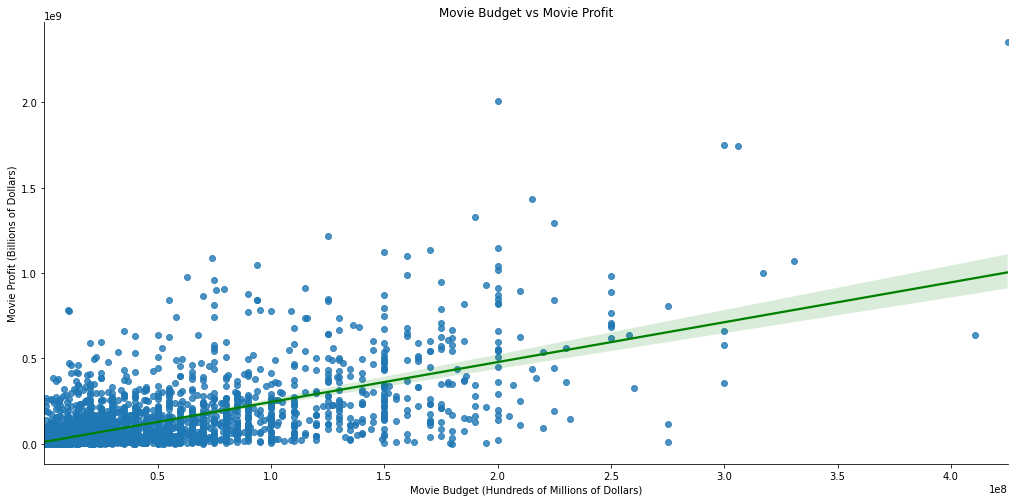

In [17]:
ax2 = sns.lmplot(x='production_budget', y='profit', data=movies_ranked, line_kws={'color': 'green'}, height=7, aspect=2)
plt.xlabel('Movie Budget (Hundreds of Millions of Dollars)', fontsize=10)
plt.ticklabel_format(axis='x')
plt.ylabel('Movie Profit (Billions of Dollars)', fontsize=10)
plt.title('Movie Budget vs Movie Profit', fontsize=12);

The upward trend (as indicated by the green line) shows that in general as a movie's budget increases, so does its profit. Based on this plot, we can begin to get a sense of what a budget should be per movie. To get a better look I will plot the top 20 movies and their budgets.

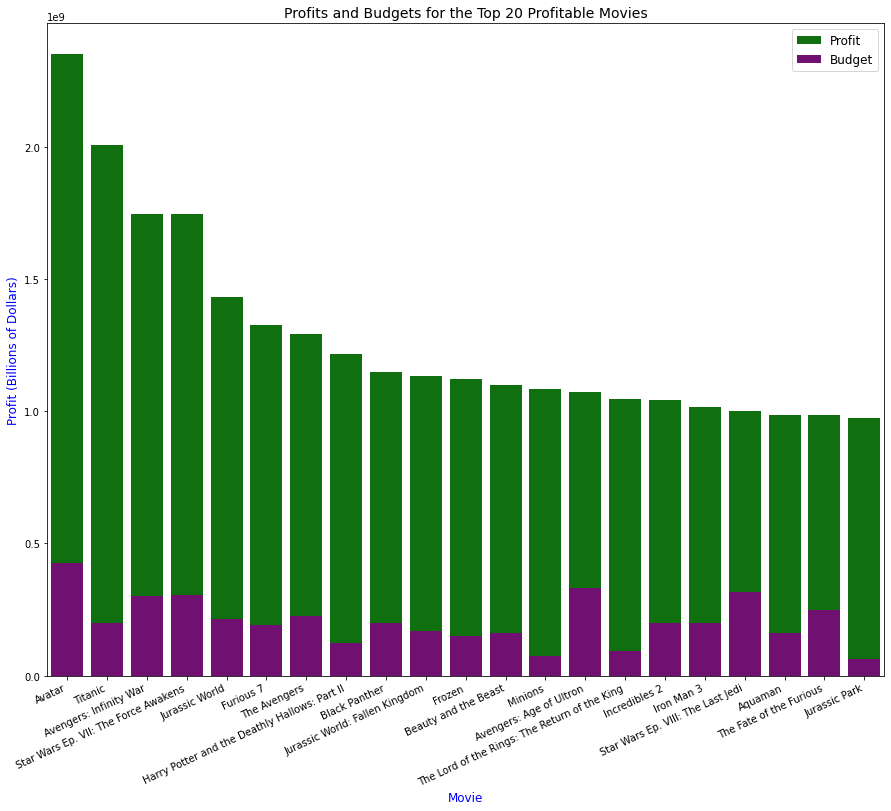

In [18]:
plt.figure(figsize=(15,12))
sns.barplot(x=movies_ranked.loc[0:20, 'movie'],y=movies_ranked.loc[0:20, 'profit'], 
            color='green', label='Profit')
sns.barplot(x=movies_ranked.loc[0:20, 'movie'],y=movies_ranked.loc[0:20, 'production_budget'], 
            color='purple', label='Budget')
plt.xlabel('Movie', fontsize=12, color='blue')
plt.title("Profits and Budgets for the Top 20 Profitable Movies", fontsize=14)
plt.ylabel('Profit (Billions of Dollars)', fontsize=12, color='blue')
plt.xticks(rotation=25, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12);

We can see clearly that the top 20 movies have incredible profits, with a mean margin of a whopping 86%! This is valuable information, especially considering that an average amount of $207,360,000 was spent per production.

In [19]:
movies_ranked.loc[0:20, 'production_budget'].mean()

207361904.76190478

In [20]:
print(movies_ranked.loc[0:20, 'profit_margin'].mean())
print(movies_ranked.loc[0:20, 'production_budget'].mean())

0.8614208520846783
207361904.76190478


Using the facts we've extracted above, we can see that the majority of the top 20 movies have a margin above 80% and now can decide on a set profit margin that we'd like to see.
Based on this, we could suggest that Microsoft aim to spend about $200,000,00 per movie with an expectation of at lease 80% in profits, however this conclusion could be flawed since many high budget movies have not had high profit margins. See the previous observation we've made that the movie Dark Phoenix not only did not earn any profit, but it also lost a large amount despite it's high budget:

In [21]:
movie_profits.query('movie=="Dark Phoenix"')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036


So to get a more accurate figure, I will examine all of the profitable movies, not simply the top 20. In doing so, I immediately notice that the production budget increased while the profits and profit margins decreased (by almost 20%!).

In [22]:
movies_ranked.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
count,3611.000000,3.611000e+03,3.611000e+03,3.611000e+03,3.611000e+03,3611.000000
mean,51.264747,3.880039e+07,6.338459e+07,1.403879e+08,1.015875e+08,0.623736
std,28.895508,4.763967e+07,7.844615e+07,2.056717e+08,1.715316e+08,0.244866
min,1.000000,1.100000e+03,4.055000e+03,7.164400e+04,3.490000e+02,0.000265
25%,26.000000,7.200000e+06,1.512481e+07,2.592765e+07,1.155564e+07,0.461530
50%,52.000000,2.100000e+07,3.901224e+07,6.883874e+07,3.930062e+07,0.675288
75%,76.000000,5.000000e+07,8.013663e+07,1.658953e+08,1.138819e+08,0.817422
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,0.999444


In [23]:
movies_ranked['production_budget'].mean()

38800385.92605926

I've decided based on this information that to filter the data with a profit margin of at least 70% and a budget greater than $38,800,385 makes the most sense, as I believe a margin any lower than 70% would not be the preferred goal of a new movie studio.

In [24]:
profit_over_70 = movie_profits.loc[(movie_profits['profit_margin'] >= 0.70) & 
                         (movie_profits['production_budget'] > 38800385)]
profit_over_70

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525
...,...,...,...,...,...,...,...,...
1436,37,"Jul 31, 1987",The Living Daylights,40000000,51185000,191200000,151200000,0.790795
1438,39,"Feb 14, 2007",Music and Lyrics,40000000,50572589,146196885,106196885,0.726396
1448,49,"Aug 12, 2011",Final Destination 5,40000000,42587643,155011165,115011165,0.741954
1483,84,"Jan 27, 2017",Resident Evil: The Final Chapter,40000000,26844692,314101190,274101190,0.872653


And finally, I will plot this new data frame to examine if our theory that the larger the budget, the higher the profit, holds true:

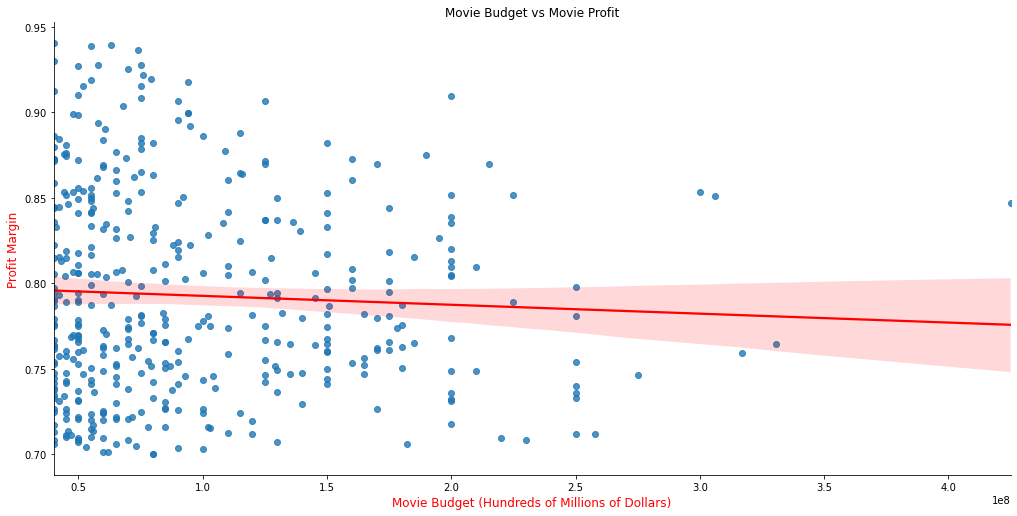

In [25]:
ax3 = sns.lmplot(x='production_budget', y='profit_margin', data=profit_over_70, 
                 line_kws={'color': 'red'}, height=7, aspect=2)
plt.xlabel('Movie Budget (Hundreds of Millions of Dollars)', fontsize=12, color='red')
plt.ticklabel_format(axis='x')
plt.ylabel('Profit Margin', fontsize=12, color='red')
plt.title('Movie Budget vs Movie Profit', fontsize=12);

And with this visualization we can clearly see that our theory in fact did not prove to be true given that the trend line (indicated in red) is negative, and thus I'd recommend that Microsoft use careful restraint in budgeting. Larger budgets do not necessarily translate to larger profits; infact, they may lead to very low profit margins. In my final examination, I notice an average profit margin .79 and a budget of $96,194,011. 

**So to conclude: I recommend that Microsoft budget around $96,194,000 for production, which should produce a profit margin of at least 79%.**

In [26]:
print(profit_over_70['production_budget'].mean())
print(profit_over_70['profit_margin'].mean())

96194011.03286386
0.7928404497327346


# How profitable is each genre?

Now that we've determined a goal budget and profit margin, let's go back to our genre table and see how each genre figures into profits and margins.

In [27]:
#Merge the genre and the profit tables and drop NaN values.
genres_and_budgets = pd.merge(movies_table, movies_ranked, how="left", on=["movie"])
genres_and_budgets.dropna(inplace=True)
genres_and_budgets.head(3)

,movie,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure,Comedy,Drama,ScienceFiction...",17.0,"Feb 12, 2010",95000000.0,88768303.0,223050874.0,128050874.0,0.574088
1,Please Give,Comedy,15.0,"Apr 30, 2010",3000000.0,4033574.0,4570178.0,1570178.0,0.343570
5,"10,000 B.C.","Action & Adventure,Classics,Drama",51.0,"Mar 7, 2008",105000000.0,94784201.0,269065678.0,164065678.0,0.609761


In [28]:
#Narrowing each movie down to one genre for easy plotting.
genres_and_budgets['genres'] = genres_and_budgets['genres'].str.split(',').str[0]

In [29]:
#Average profit and profit margin per genre.
genre_profits = genres_and_budgets.groupby('genres', as_index=False)[['profit', 'profit_margin']].median().sort_values(by='profit', ascending=False)

In [30]:
genre_profits

,genres,profit,profit_margin
12,Romance,530998101.0,0.929947
5,CultMovies,386318929.0,0.782083
1,Animation,176926176.0,0.732873
14,Western,85864886.0,0.580698
9,Kids & Family,83400000.0,0.804971
13,ScienceFiction & Fantasy,78354449.0,0.604511
0,Action & Adventure,78114471.0,0.642003
11,Mystery & Suspense,41123210.0,0.739146
8,Horror,36869953.5,0.776837
4,Comedy,31023502.0,0.644433


Now I'll plot my findings:

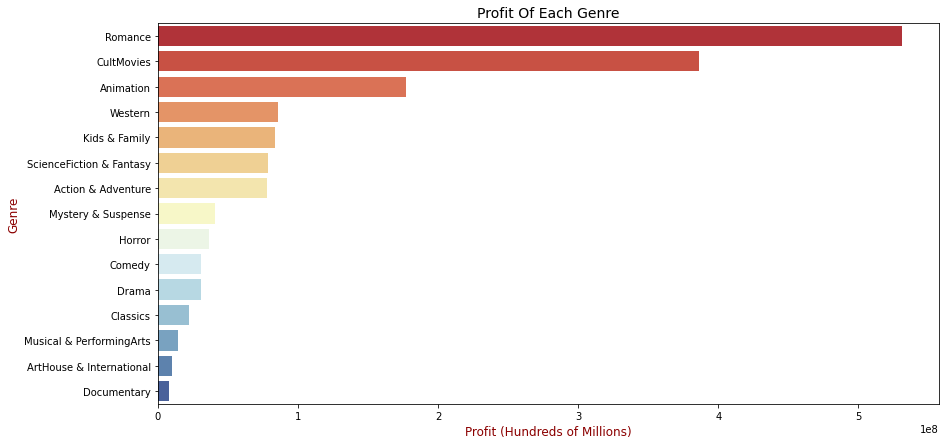

In [31]:
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=genre_profits['profit'], y=genre_profits['genres'], palette='RdYlBu')
plt.xlabel('Profit (Hundreds of Millions)', fontsize=12, color='darkred')
plt.ylabel('Genre', fontsize=12, color='darkred')
plt.title('Profit Of Each Genre', fontsize=14);

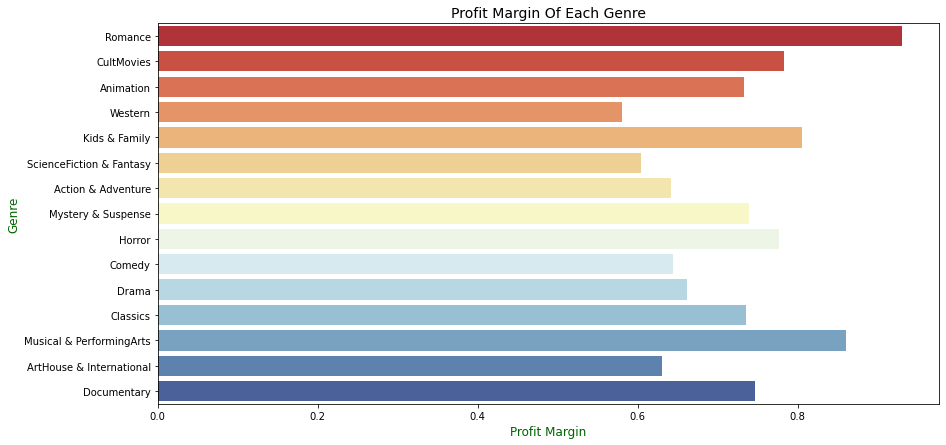

In [32]:
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=genre_profits['profit_margin'], y=genre_profits['genres'], palette='RdYlBu')
plt.xlabel('Profit Margin', fontsize=12, color='darkgreen')
plt.ylabel('Genre', fontsize=12, color='darkgreen')
plt.title('Profit Margin Of Each Genre', fontsize=14);

Although not among the top 3 most produced genres, romance, cult, and animation movies generally have the highest profit. In terms of profit margin, Romance takes the lead with an approximate 90% profit margin. Following closely behind with a desirable profit margin is Musical & Performing Arts and Kids & Family.
It's interesting to note the low profit of documentaries is a stark contrast to their high profit margin. This could be due to the fact that in general, documentaries don't require high budgets, thus producing a high margin with whatever amount of profits they generate.

# When is the best time to release a movie?

Lastly, I'd like to examine when is the best time of year to release movies, and how profitable each month can be. This is important to note because many films are shown during school breaks (i.e. Christmas movies during Christmas time, etc.) and it would be useful to determine when a studio could gain the most profit.
I begin by examining the movie_profits data frame, since we are focusing on which films have a high profit margin.

In [33]:
movie_profits.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251


In [39]:
#In order to work with the dates, I change the column type to datetime
movie_profits.loc[:, ('release_date')] = pd.to_datetime(movie_profits['release_date'])

#I make a new month column to display only the month of the release date. The %B directive means the full month name.
releasemonth =  [x.strftime('%B') for x in movie_profits['release_date']]
movie_profits.loc[:, ('month')] = releasemonth

#Count the total number of movies and group by month.
moviesper_mo = movie_profits.groupby(['month'], as_index=False)['movie'].count().sort_values(by='movie', ascending=False)
moviesper_mo

,month,movie
2,December,550
10,October,530
1,August,467
9,November,456
11,September,455
6,June,450
7,March,427
0,April,423
5,July,416
8,May,382


At a first glance, we can see that the top 2 months for movie releases are December and October, followed by August. To get a better look:

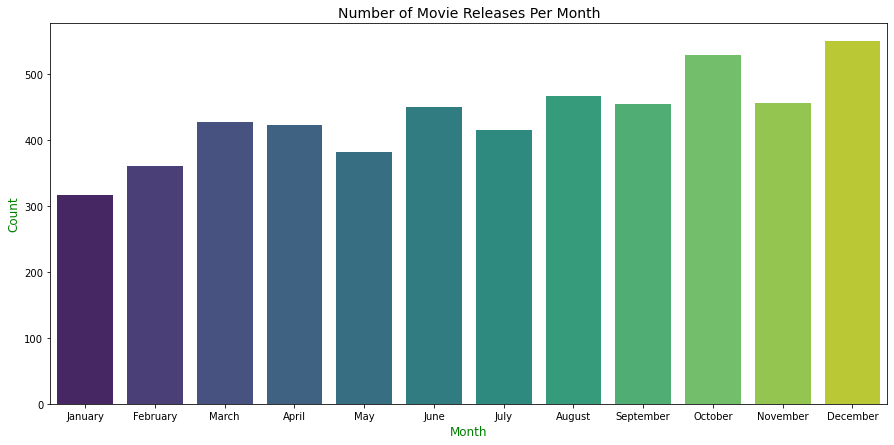

In [35]:
plt.figure(figsize=(15,7))
ax6 = sns.countplot(x=movie_profits['month'], palette='viridis',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 
                          'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12, color='green')
plt.ylabel('Count', fontsize=12, color='green')
plt.title('Number of Movie Releases Per Month', fontsize=14);

While it's valuable information to know that most movies are released in December, it's important to know if this translates to high profitability as well. To understand this, I will calculate and examine the average profit of movies, per month.

In [42]:
#I group the movies by month and show the average profit and profit margin for each.
profitpermo = (movie_profits.groupby('month', as_index=False)[['profit', 'profit_margin']].median()
               .sort_values(by='profit', ascending=False))

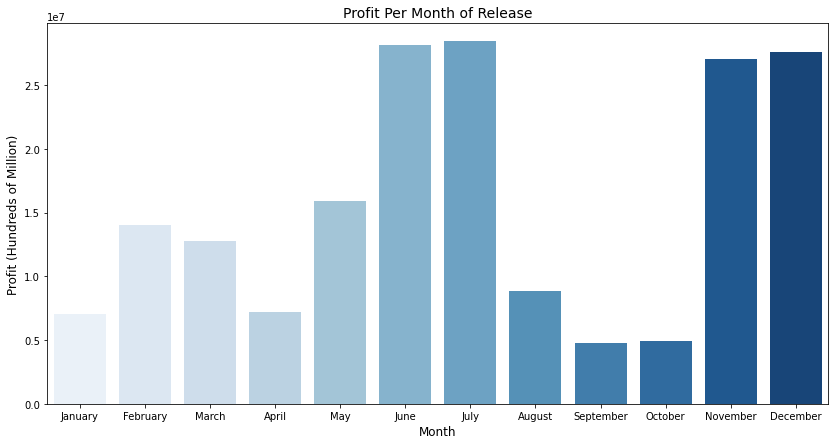

In [43]:
#Now I plot the profit first:
plt.figure(figsize=(14,7))
ax7 = sns.barplot(x=profitpermo['month'], y=profitpermo['profit'], palette='Blues', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit (Hundreds of Million)', fontsize=12)
plt.title('Profit Per Month of Release', fontsize=14);

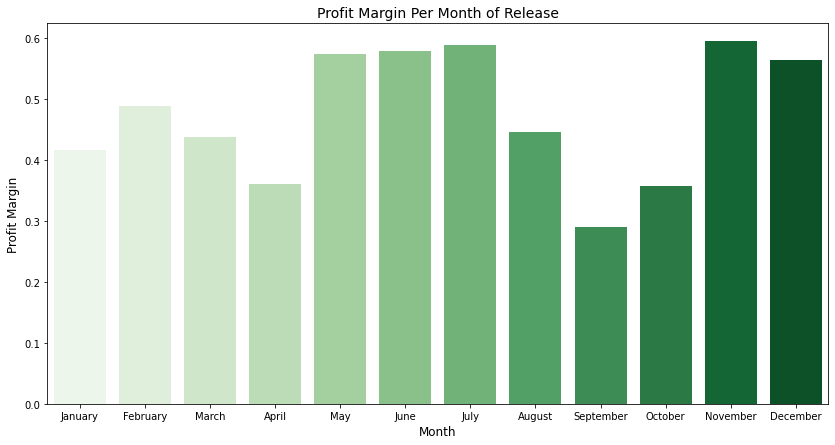

In [38]:
#And the profit margins
plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=profitpermo['month'], y=profitpermo['profit_margin'], palette='Greens', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin Per Month of Release', fontsize=14);

As expected, July and November are at the top in terms of both average profit and profit margin. It appears that movie releases during the summer months tend to result in greater success, while the holiday season also shows much promise. This most likely is attributed to the school and holiday breaks.

## Conclusions

In concluding this analysis, I have determined that although many other factors could be considered that may alter decision making, the following conclusions should contribute to Microsoft's success as it enters the movie making industry:

1- **A budget around $96,194,000 to produce a film should result in a profit margin of around 80%**.

2- **Plan to release movies between June and July, as well as over the winter holiday break.** Given that most children and their parents have breaks from school and work during these times, productions see a general increase in popularity and profitability.

3- **Microsoft should focus their efforts on the top 6 most profitable movie genres: Romance, Cult, Animation, Western, Kids & Family, and Sci-Fi.** Given the fact that a number of these genres, such as Animation and Kids & Family, aren't produced as frequently as others but nonetheless have impressive profit margins,  I'd recommend that Microsoft consider these genres particularly to potentially increase their profits greatly without much competiton.

# Next Steps

In addition to my conclusions above, I'd recommend Microsoft take the following next steps:

1- **Research and emulate the best strategies of well known, well established studios to build a successful studio from the start.**

2- **Carefully analyze and determine which directors and producers contribute the most to a movie's success.** This can be determined by examining the profits and profit margins of the top movies of a given genre or era, and filtering them out by the film's director and production team. Doing so will only contribute to the movie's potential, along with carefully budgeting and planning it's timed release.

3 - **Determine which actors are most valuable to movie production.** Factoring in the actors' salaries and hit movie count while calculating the budget and projected profit will further contribute to a greater profit margin.